# Mounting Google Drive

1. Create a folder named ``ML`` in your drive

2. Upload the compressed file ``hw4.zip`` into that folder

3. Run the below code snippet and follow the instructions to give access to Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

4. We will change our current directory, so that it is easier to import the necessary files from our drive. To do so, just run the below code cell

In [ ]:
cd drive/MyDrive/ML

5. Now that we are in the desired location, we can unzip the compressed file.

  **Note that this step needs to be done only once**

In [ ]:
!unzip hw4.zip

6. Run the below code snippet to import all the necessary libraries, as well as the module(``bagging.py``), which you will fill in soon.

In [24]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid') # Plot style
plt.rcParams['figure.figsize'] = (12.0, 8.0)

from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from bagging import Bagging, RandomForest

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<ipython-input-24-f895fb889f3a>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # Plot style


In this homework we will use a variation of the digits data. You can find the [here](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

In [25]:
data = datasets.load_digits(n_class=2)
X = data.data
y = data.target
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (360, 64)
y shape: (360,)


We will set a test set aside for final evaluation.

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=20,
                                                    random_state=0)



In [27]:
print('Train:', y_train.shape)
print('Test:', y_test.shape)

Train: (340,)
Test: (20,)


As you may have noticed we have a small set of training data, which means that we should not put aside additional data for validation, instead we will use cross-validation.

# Cross-Validation

Until now we have evaluated our models based on their score on a hold-out test set. In this homework, you will need to implement your own cross-validation method inside the function below.

In [28]:
def do_cross_validation(model, X_train, y_train, k, random_state):
  """
  Computes the cross-validation accuracy score
  :param model: model object that has fit and predict methods
  :param X_train: nd array of size (nr_data_points, nr_features)
  :param y_train: nd array of size (nr_data_points, )
  :param k: int for the number of folds (usually k={1,5,10})
  :param random_state: int for fixing the randomness in order to reproduce
                       the same results
  :returns: float of the cross-validation score
  """
  # Hints: you need to
  # 1. shuffle your data
  # 2. split your data into k disjoint parts
  # 3. for each of the k steps:
  #       select k-1 parts for training
  #      (you may need to concatenate your data)
  #      and use the other part for testing
  #      save the accuracy score (use sklearn's function) on the test set
  #      in some data structure (e.g. list)
  # 4. when you do the above procedure, you will have k accuracy scores
  # your function should return the average of those numbers

  nr_data_points = X_train.shape[0]
  np.random.seed(random_state)
  indices = np.arange(nr_data_points)
  np.random.shuffle(indices)

  # YOUR CODE HERE
  nr_data_in_each_fold = nr_data_points // k
  fold_indices = np.arange(0, nr_data_points+1, nr_data_in_each_fold)
  scores = []
  for k_ in range(k):
    st = fold_indices[k_]
    end = fold_indices[k_+1]
    test_indices = indices[st:end]
    x_te = X_train[test_indices, :]
    y_te = y_train[test_indices]
    train_indices = np.array(list(set(indices) - set(test_indices)))
    x_tr = X_train[train_indices, :]
    y_tr = y_train[train_indices]
    model.fit(x_tr, y_tr)
    preds = model.predict(x_te)
    scores.append(accuracy_score(y_te, preds))
  return np.mean(scores)

# Bagging

Complete the incomplete parts in `bagging.py` script. For the base_estimator we will use the DecisionTreeClassifier from sklearn, but you can also use your own implementation if you want to.

In order to check your implementation, make sure that your Bagging model is able to learn from data (even overfit on it) and result in almost perfect classification on this simple task. You should get above 99% CV accuracy with 20 models.



In [29]:
model = Bagging(base_estimator=DecisionTreeClassifier, nr_estimators=20)
cv_acc = do_cross_validation(model, X_train, y_train, k=10, random_state=0)
print('CV accuracy is:', cv_acc)

Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be

CV accuracy is: 0.9911764705882353


Choose the best value for the number of models in the ensemble based on 10-fold cross-validation (keep the ``random_seed=0``). Plot a figure to show what happens with the CV accuracy when we change the number of models.

In [30]:
scores = []
ks = np.arange(1, 21, 2)

for k in ks:
  model = Bagging(base_estimator=DecisionTreeClassifier, nr_estimators=k)
  cv_acc = do_cross_validation(model, X_train, y_train, k=10, random_state=0)
  print('CV accuracy is:', cv_acc)
  scores.append(cv_acc)

print(f"Best M: {ks[np.argmax(scores)]}")

Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be

CV accuracy is: 0.9882352941176471


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be

CV accuracy is: 0.9941176470588236


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be

CV accuracy is: 0.9941176470588236


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be

CV accuracy is: 0.9911764705882353


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be

CV accuracy is: 0.9882352941176471


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be

CV accuracy is: 0.9911764705882353


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be

CV accuracy is: 0.9911764705882353


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be

CV accuracy is: 0.9941176470588236


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be

CV accuracy is: 0.9911764705882353


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be

CV accuracy is: 0.9911764705882353
Best M: 3


**Question** Based on your experiments, what is the best value for the number of models in the ensemble?

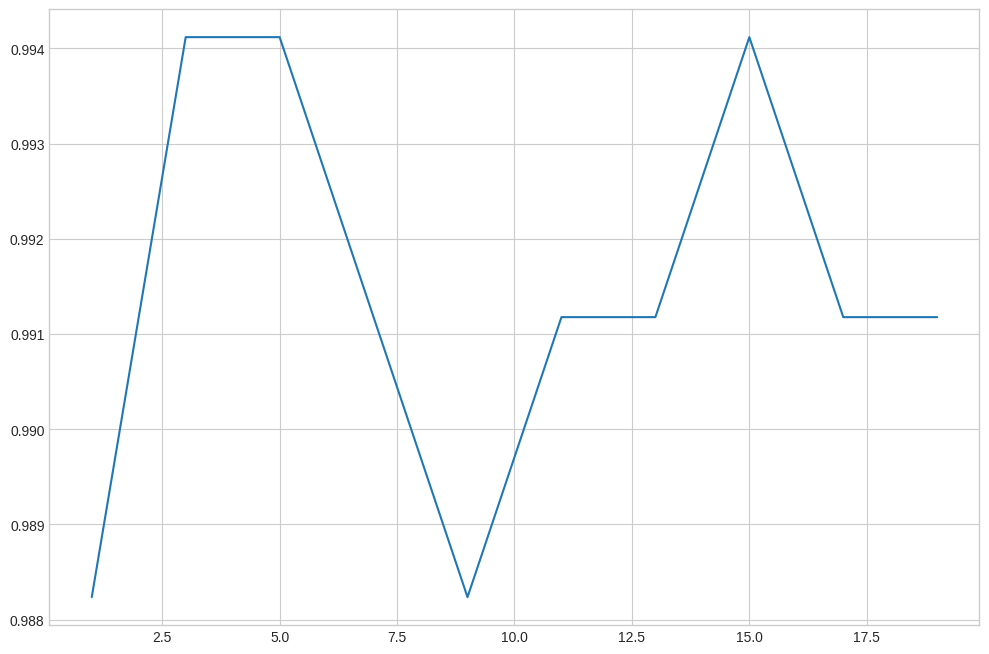

In [31]:
plt.plot(ks, scores)

**Answer**

Use the best value of the number of models and train the final model on the whole train dataset and test the model on the train and test sets.

In [32]:
model1 = Bagging(base_estimator=DecisionTreeClassifier, nr_estimators=3)
model1.fit(X_train, y_train)
preds1 = model1.predict(X_train)
preds2 = model1.predict(X_test)
print('Bagging train accuracy:', accuracy_score(y_train, preds1))
print('Bagging test accuracy:', accuracy_score(y_test, preds2))

Model Training: 100% [-----------------------------------------] Time:  0:00:00


Bagging train accuracy: 0.9970588235294118
Bagging test accuracy: 1.0


/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
/content/bagging.py:94: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]


**Question:** What results did you get? How well did the algorithm learn?

**Answer:**

# Random Forest

Now we will check the implementation for the Random Forest classifier. Make sure you get above 99% CV accuracy.

In [33]:
model = RandomForest(10)
cv_acc = do_cross_validation(model, X_train, y_train, k=10, random_state=0)
print('CV accuracy is:', cv_acc)

Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer 

CV accuracy is: 0.9970588235294118


/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]


Again, choose the best value for the number of models in the ensemble based on 10-fold cross-validation (keep the ``random_seed=0``). Plot a figure to show what happens with the CV accuracy when we change the number of models.

In [34]:
scores = []
ks = np.arange(1, 21, 2)

for k in ks:
  model = RandomForest(10)
  cv_acc = do_cross_validation(model, X_train, y_train, k=10, random_state=0)
  print('CV accuracy is:', cv_acc)
  scores.append(cv_acc)

print(f"Best M: {ks[np.argmax(scores)]}")

Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer 

CV accuracy is: 0.9970588235294118


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer 

CV accuracy is: 0.9970588235294118


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer 

CV accuracy is: 0.9970588235294118


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer 

CV accuracy is: 0.9970588235294118


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer 

CV accuracy is: 0.9970588235294118


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer 

CV accuracy is: 0.9970588235294118


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer 

CV accuracy is: 0.9970588235294118



/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mo

CV accuracy is: 0.9970588235294118


/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mod

CV accuracy is: 0.9970588235294118


Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer 

CV accuracy is: 0.9970588235294118
Best M: 1


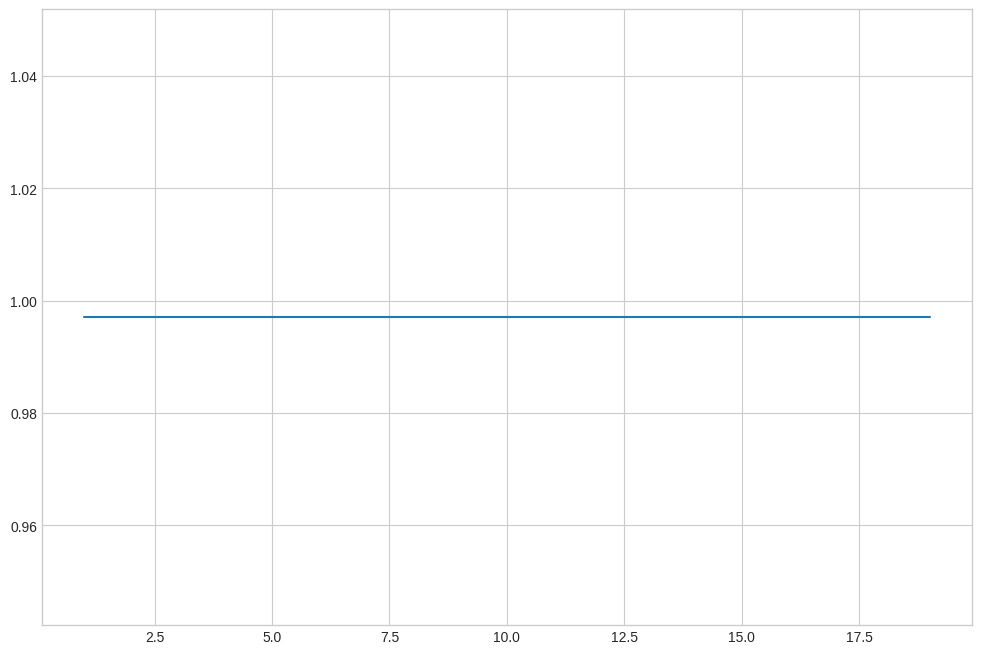

In [35]:
plt.plot(ks, scores)

**Question** Based on your experiments, what is the best value for the number of models in the ensemble?

**Answer**

Use the best value of the number of models and train the final model on the whole train dataset and test the model on the train and test sets.

In [36]:
model2 = RandomForest(1)
model2.fit(X_train, y_train)
preds_rf1 = model2.predict(X_train)
preds_rf2 = model2.predict(X_test)
print('Bagging train accuracy:', accuracy_score(y_train, preds_rf1))
print('Bagging test accuracy:', accuracy_score(y_test, preds_rf2))

Model Training: 100% [-----------------------------------------] Time:  0:00:00


Bagging train accuracy: 0.9529411764705882
Bagging test accuracy: 0.85


/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]
/content/bagging.py:172: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  return mode(y_preds, axis=1)[0]


**Question:** What results did you get? How well did the algorithm learn?

**Answer:**

# Out-of-bag Score

Now choose the best number of models in the ensemble based on the OOB score, for both of the algorithms.

In [53]:
model = Bagging(base_estimator=DecisionTreeClassifier, nr_estimators=3, oob_score=True)
model.fit(X_train, y_train)
print(model.oob_score)

Model Training: 100% [-----------------------------------------] Time:  0:00:00
/content/bagging.py:74: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  print(x_idx in np.array(self.models[i].idx).flatten() )


ValueError: ignored

In [22]:
model = RandomForest(1, oob_score=True)
model.fit(X_train, y_train)
print(model.oob_score)

Model Training: 100% [-----------------------------------------] Time:  0:00:00


AttributeError: ignored

**Question:** Are the numbers (of the models) the same as with the cross-validation (CV) method? Is the overall trend of the both scores (OOB vs CV) the same when changing the number of models?

**Answer:**

**Question:** In this homework, we have not compared the results of our implementation with that of sklearn's. Can you guess why?

**Answer:**

# Mounting Google Drive

1. Create a folder named ``ML`` in your drive

2. Upload the compressed file ``hw7.zip`` into that folder

3. Run the below code snippet and follow the instructions to give access to Colab

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

4. We will change our current directory, so that it is easier to import the necessary files from our drive. To do so, just run the below code cell

In [ ]:
cd drive/MyDrive/ML

5. Now that we are in the desired location, we can unzip the compressed file.

  **Note that this step needs to be done only once**

In [ ]:
!unzip hw7.zip

6. Run the below code snippet to import all the necessary libraries, as well as the module(``bagging.py``), which you will fill in soon.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

plt.style.use('seaborn-whitegrid') # Plot style

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<ipython-input-62-2c60067fbcc0>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid') # Plot style


In [ ]:
!unzip hw7.zip

In this homework we will use a variation of the digits data. You can find the [here](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits).

In [63]:
data = datasets.load_digits(n_class=2)
X = data.data
y = data.target
print('X shape:', X.shape)
print('y shape:', y.shape)

X shape: (360, 64)
y shape: (360,)


We will set a test set aside for final evaluation.

In [64]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=20,
                                                    random_state=0)



In [65]:
print('Train:', y_train.shape)
print('Test:', y_test.shape)

Train: (340,)
Test: (20,)


# Adaboost

Implement the ``Adaboost`` class inside the ``boosting.py`` script and make sure the model can overfit the data.

In [66]:
from boosting import Adaboost, GradientBoostingClassifier

In [67]:
model1 = Adaboost()
model1.fit(X_train, y_train)
preds_train1 = model1.predict(X_train)
preds_test1 = model1.predict(X_test)
print('Train acc:', accuracy_score(y_train, preds_train1))
print('Test acc:', accuracy_score(y_test, preds_test1))

Train acc: 0.5117647058823529
Test acc: 0.4


# Gradient Boosting

Implement the ``GradientBoostingClassifier`` class (**for binary classification**) inside the ``boosting.py`` script and again make sure the model can overfit the data. Ideally, you should have a base class called ``GradientBoosting`` and 2 child classes ``GradientBoostingRegressor`` and ``GradientBoostingClassifier``, since the Classifier "depends" on the Regressor in some sense.

In [76]:
model2 = GradientBoostingClassifier()
model2.fit(X_train, y_train)
preds_train2 = model2.predict(X_train)
preds_test2 = model2.predict(X_test)
print('Train acc:', accuracy_score(y_train, preds_train2))
print('Test acc:', accuracy_score(y_test, preds_test2))

TypeError: ignored